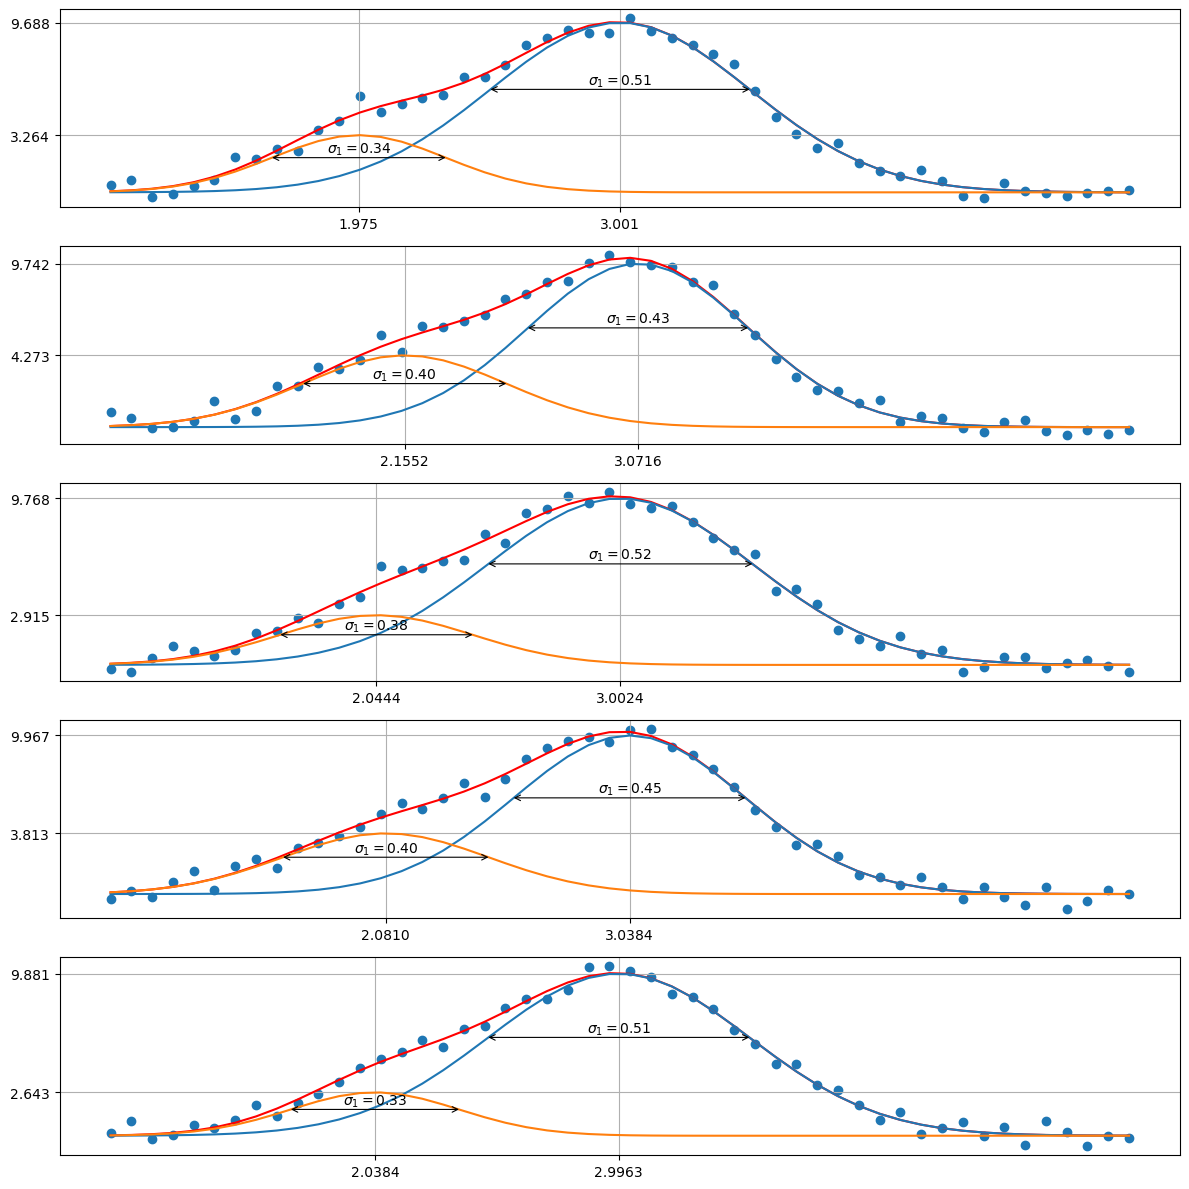

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))
# Erstellen von Beispiel-Daten
x = np.linspace(1, 5, 50)

def two_gauss(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return gauss(x, A1, mu1, sigma1) + gauss(x, A2, mu2, sigma2)
org_params = [10, 3, 0.5, 3, 2, 0.35]



N=5
# Schätzen der Parameter und Anpassen der Funktion
fig, axs = plt.subplots(N,1,figsize=(12,12))
for i in range(N):
    y = two_gauss(x, *org_params) + 0.4*np.random.randn(len(x))
    initial_guess = np.array(org_params) + 0.1 * np.random.randn(6)
    popt, pcov = curve_fit(two_gauss, x, y, p0=initial_guess)
    axs[i].scatter(x, y)
    axs[i].plot(x, two_gauss(x, *popt), 'r-', label='Anpassung')
    axs[i].plot(x, gauss(x, *popt[:3]), label='g1')
    axs[i].plot(x, gauss(x, *popt[-3:]), label='g2')
    axs[i].set_xticks([popt[1], popt[4]])
    axs[i].set_yticks([popt[0], popt[3]])
    axs[i].grid()

    # Add double-headed arrow for sigma of g1
    sigma1 = popt[2]
    height1 = gauss(popt[1]-sigma1, *popt[:3])
    arrow1 = axs[i].annotate('', xy=(popt[1]-sigma1, height1), xytext=(popt[1]+sigma1, height1),
                             arrowprops=dict(arrowstyle='<->', color='black', shrinkA=0, shrinkB=0, linewidth=0.8))
    axs[i].text(popt[1],height1+0.3, f'$\sigma_1 = {sigma1:.2f}$', ha='center')


    # Add double-headed arrow for sigma of g2
    sigma2 = popt[5]
    height2 = gauss(popt[4]-sigma2, *popt[-3:])
    arrow2 = axs[i].annotate('', xy=(popt[4]-sigma2, height2), xytext=(popt[4]+sigma2, height2),
                             arrowprops=dict(arrowstyle='<->', color='black', shrinkA=0, shrinkB=0, linewidth=0.8))
    axs[i].text(popt[4],height2+0.3, f'$\sigma_1 = {sigma2:.2f}$', ha='center')







fig.tight_layout()
# Plotten der Daten und der Anpassung

fig.savefig("out/sim_gaußfit")

In [95]:
E = [5.388, 5.443, 5.4857, 5.512, 5.5443]
I = [.014, .128, .852, .002, .0034]

[Text(0.5, 0, 'E / MeV')]

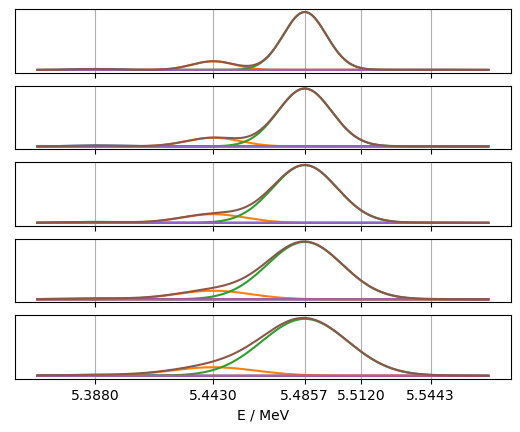

In [125]:
energies = np.linspace(np.min(E) - np.min(E) * 0.005, np.max(E) + np.min(E) * 0.005, 1000)
N=5
sigmas = np.linspace(0.01, 0.02, N)
fig, axs = plt.subplots(N, 1, sharex=True)
for n in range(N):
    total_inten= np.zeros(len(energies))
    for i, e in enumerate(E):
        inten = gauss(energies, I[i], e, sigmas[n])
        total_inten += inten
        axs[n].plot(energies, inten)
    axs[n].plot(energies, total_inten)
    axs[n].set_xticks(E)
    axs[n].set_yticks([])
    axs[n].grid()
axs[-1].set(xlabel="E / MeV")